# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
# Your code here :
# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

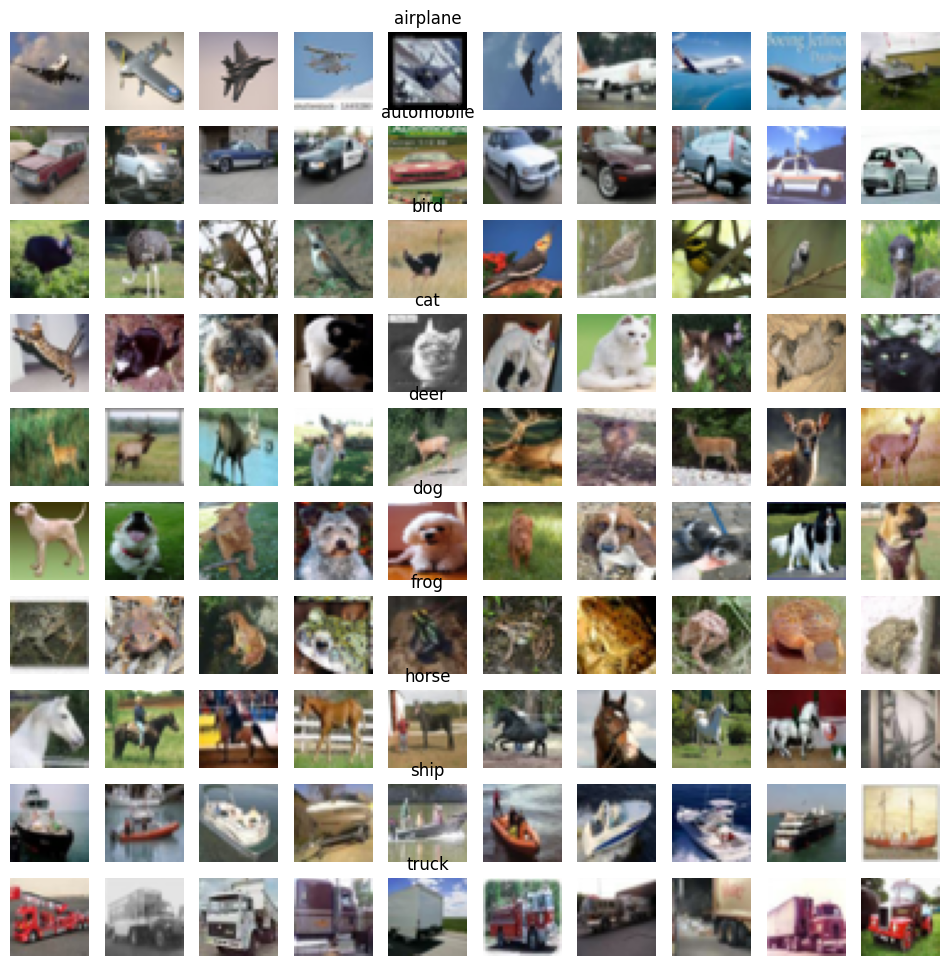

In [4]:

# 1. Visualize 10 random samples from each class
plt.figure(figsize=(12,12))
for i, class_name in enumerate(class_names):
    # Get indices of images belonging to the current class
    idxs = np.where(y_train.flatten() == i)[0]
    # Randomly select 10 images
    idxs = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(idxs):
        plt_idx = i*10 + j + 1
        plt.subplot(10, 10, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if j == 4:  # Show class name in the middle of each row
            plt.title(class_name)
plt.show()


In [5]:
# 2. Convert labels to one-hot encoded form
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)


In [6]:
# 3. Normalize the images
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0


In [7]:
# Print shapes to confirm
print("x_train shape:", x_train_norm.shape)
print("y_train shape:", y_train_onehot.shape)
print("x_test shape:", x_test_norm.shape)
print("y_test shape:", y_test_onehot.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.backend import clear_session

# Clear any previous models from memory
clear_session()

# Define the CNN model
model = Sequential([
    # Convolutional layer
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    # Max pooling layer
    MaxPooling2D(pool_size=(2,2)),
    # Flatten the feature maps to feed into the dense layers
    Flatten(),
    # Dense layer with 100 units
    Dense(100, activation='relu'),
    # Output classification layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
from tensorflow.keras.optimizers import SGD

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),  # momentum helps convergence
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on CIFAR-10
history = model.fit(x_train_norm, y_train_onehot,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_norm, y_test_onehot),
                    verbose=1)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.2076 - loss: 2.1555 - val_accuracy: 0.3503 - val_loss: 1.8248
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3845 - loss: 1.7629 - val_accuracy: 0.4332 - val_loss: 1.6060
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4528 - loss: 1.5594 - val_accuracy: 0.4941 - val_loss: 1.4369
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5012 - loss: 1.4183 - val_accuracy: 0.5285 - val_loss: 1.3374
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5365 - loss: 1.3249 - val_accuracy: 0.5301 - val_loss: 1.3169
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5613 - loss: 1.2609 - val_accuracy: 0.5491 - val_loss: 1.2799
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5747 - loss: 1.2120 - val_accuracy: 0.5615 - val_loss: 1.2400
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5870 - loss: 1.1795 - val_accuracy: 0.5645 - v

*   Plot the cross entropy loss curve and the accuracy curve

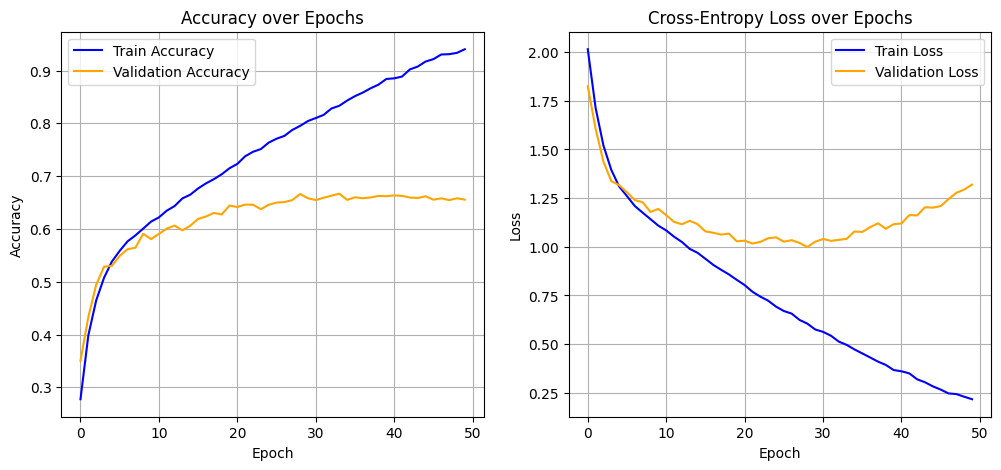

In [11]:
# Your code here :
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

# Accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Cross-entropy loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Cross-Entropy Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

In [12]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.backend import clear_session

# Clear previous models
clear_session()

# Define the VGG-style CNN model
vgg_model = Sequential([
    # First convolutional block
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
vgg_model.summary()

# Train the model for 50 epochs with batch size 512
history_vgg = vgg_model.fit(x_train_norm, y_train_onehot,
                            epochs=50,
                            batch_size=512,
                            validation_data=(x_test_norm, y_test_onehot),
                            verbose=1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.2048 - loss: 2.1661 - val_accuracy: 0.3566 - val_loss: 1.8407
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3804 - loss: 1.7667 - val_accuracy: 0.4271 - val_loss: 1.6090
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4354 - loss: 1.6025 - val_accuracy: 0.4873 - val_loss: 1.4661
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4854 - loss: 1.4503 - val_accuracy: 0.5072 - val_loss: 1.3839
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5233 - loss: 1.3400 - val_accuracy: 0.5349 - val_loss: 1.2968
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5566 - loss: 1.2588 - val_accuracy: 0.5462 - val_loss: 1.2804
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5891 - loss: 1.1668 - val_accuracy: 0.5880 - val_loss: 1.1535
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6178 - loss: 1.0845 - val_accuracy: 0.5950 - 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :
from tensorflow.keras.optimizers import SGD
from keras.backend import clear_session

# Clear previous models from memory
clear_session()

# Compile the VGG-style model
vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_vgg = vgg_model.fit(x_train_norm, y_train_onehot,
                            epochs=50,
                            batch_size=512,
                            validation_data=(x_test_norm, y_test_onehot),
                            verbose=1)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.6593 - val_loss: 2.5693
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.6587 - val_loss: 2.5808
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.6583 - val_loss: 2.6020
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accuracy: 0.6587 - val_loss: 2.6177
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.6596 - val_loss: 2.6346
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.6589 - val_loss: 2.6494
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.6596 - val_loss: 2.6637
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.6603 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


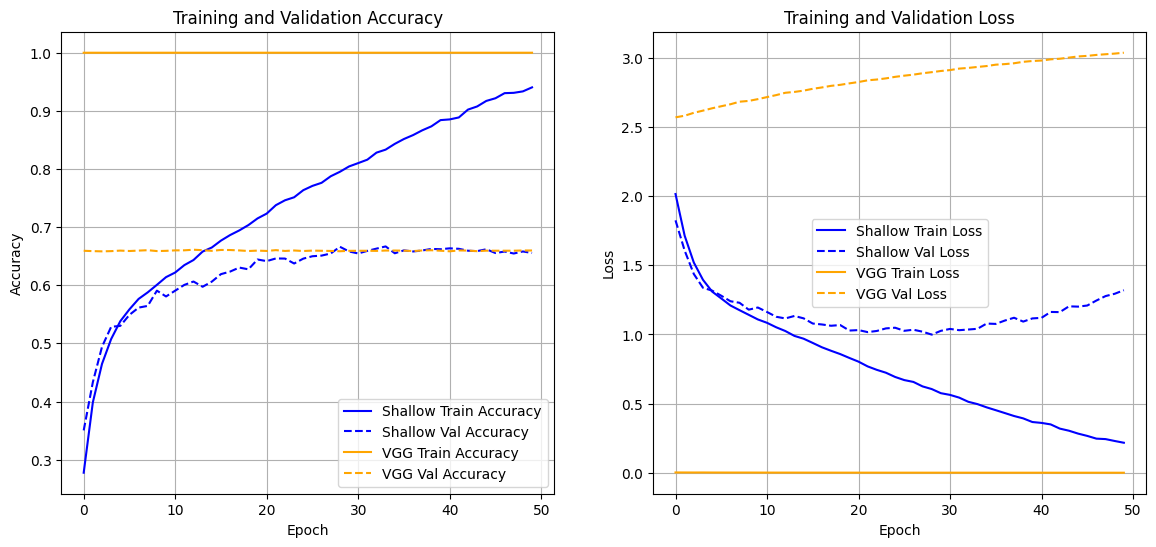

In [15]:
# Your code here :
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# --- Accuracy comparison ---
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Shallow Train Accuracy', color='blue', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Shallow Val Accuracy', color='blue', linestyle='--')
plt.plot(history_vgg.history['accuracy'], label='VGG Train Accuracy', color='orange', linestyle='-')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Val Accuracy', color='orange', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss comparison ---
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Shallow Train Loss', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='Shallow Val Loss', color='blue', linestyle='--')
plt.plot(history_vgg.history['loss'], label='VGG Train Loss', color='orange', linestyle='-')
plt.plot(history_vgg.history['val_loss'], label='VGG Val Loss', color='orange', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Figure size 1000x800 with 0 Axes>

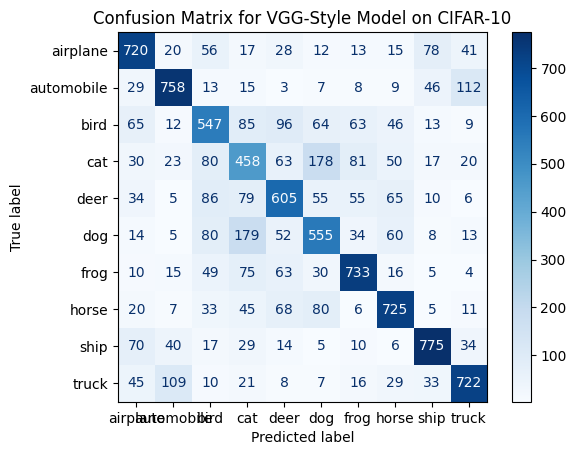

In [16]:
# Your code here :
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict class probabilities for the test set
y_pred_probs = vgg_model.predict(x_test_norm)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for VGG-Style Model on CIFAR-10')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [17]:
# Your code here :
# Evaluate the model on test set
test_loss, test_accuracy = vgg_model.evaluate(x_test_norm, y_test_onehot, verbose=0)

print(f"Test Accuracy for VGG-style model: {test_accuracy*100:.2f}%")


Test Accuracy for VGG-style model: 65.98%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
